## Data Augmentation

In [2]:
base_path = "/Volumes/Shawn_HDD/PhD/Project/Date/augmentation_from_matlab/Cropped/based_on_truth/x100100y100100z8080"
volumes_path = base_path + "/volumes"
points_path = base_path + "/points"
length_path = base_path + "/length"


In [92]:
import numpy as np
import Functions.MyDataset as MyDataset

pat_name = "DE"
pat_volume_left = np.load(f"{volumes_path}/{pat_name}_augVolume_1_cropped_left.npy")
pat_volume_right = np.load(f"{volumes_path}/{pat_name}_augVolume_1_cropped_right.npy")
pat_point_left = np.load(f"{points_path}/{pat_name}_augPoints_1_cropped_left.npy")
pat_point_right = np.load(f"{points_path}/{pat_name}_augPoints_1_cropped_right.npy")
pat_length_left = np.load(f"{length_path}/{pat_name}_augLength_1_cropped_left.npy")
pat_length_right = np.load(f"{length_path}/{pat_name}_augLength_1_cropped_right.npy")

In [93]:
# point_left_diff = np.asarray([[1, 1, 0], [0, -1, -2]])
# point_right_diff = np.asarray([[0, 2, 0], [0, 1, -1]])
point_left_diff = np.asarray([[0, 0, 0], [0, 0, 0]])
point_right_diff = np.asarray([[0, 0, 0], [0, 0, 0]])

pat_point_left_new = pat_point_left - point_left_diff
pat_length_left_new = pat_length_left + point_left_diff

point_right_diff[:, 0] = - point_right_diff[:, 0]
pat_point_right_new = pat_point_right - point_right_diff
pat_length_right_new = pat_length_right + point_right_diff

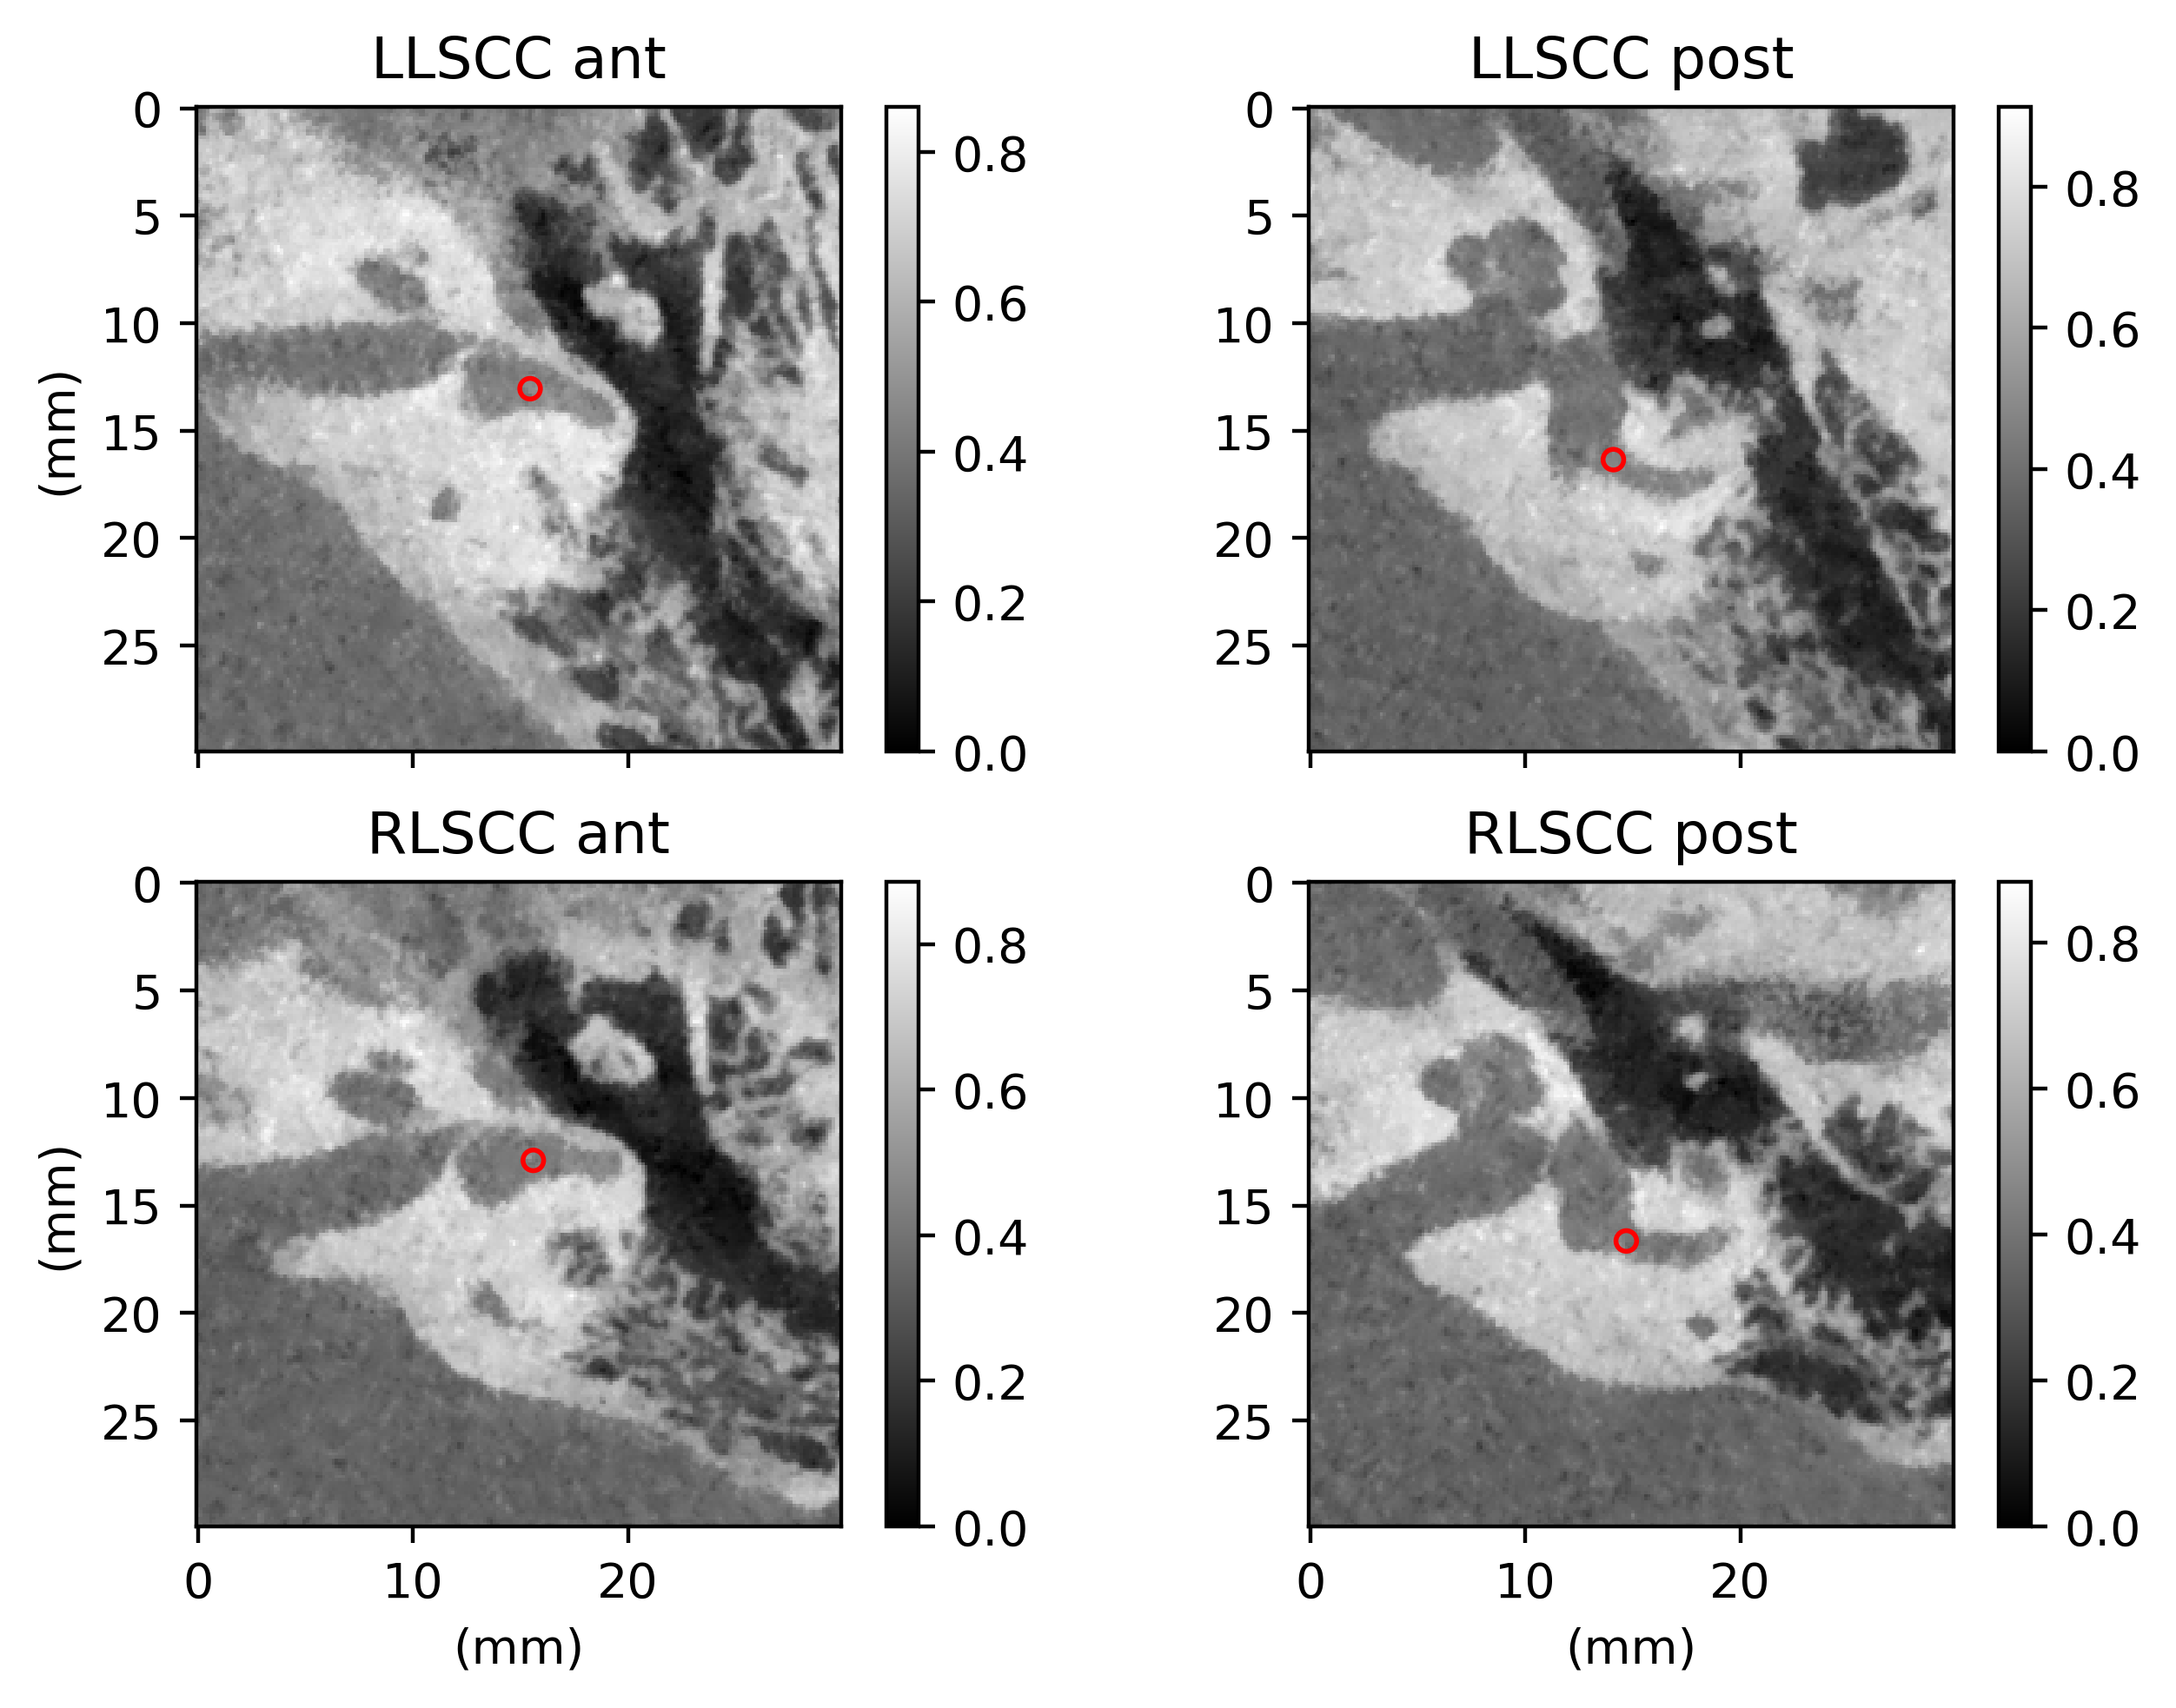

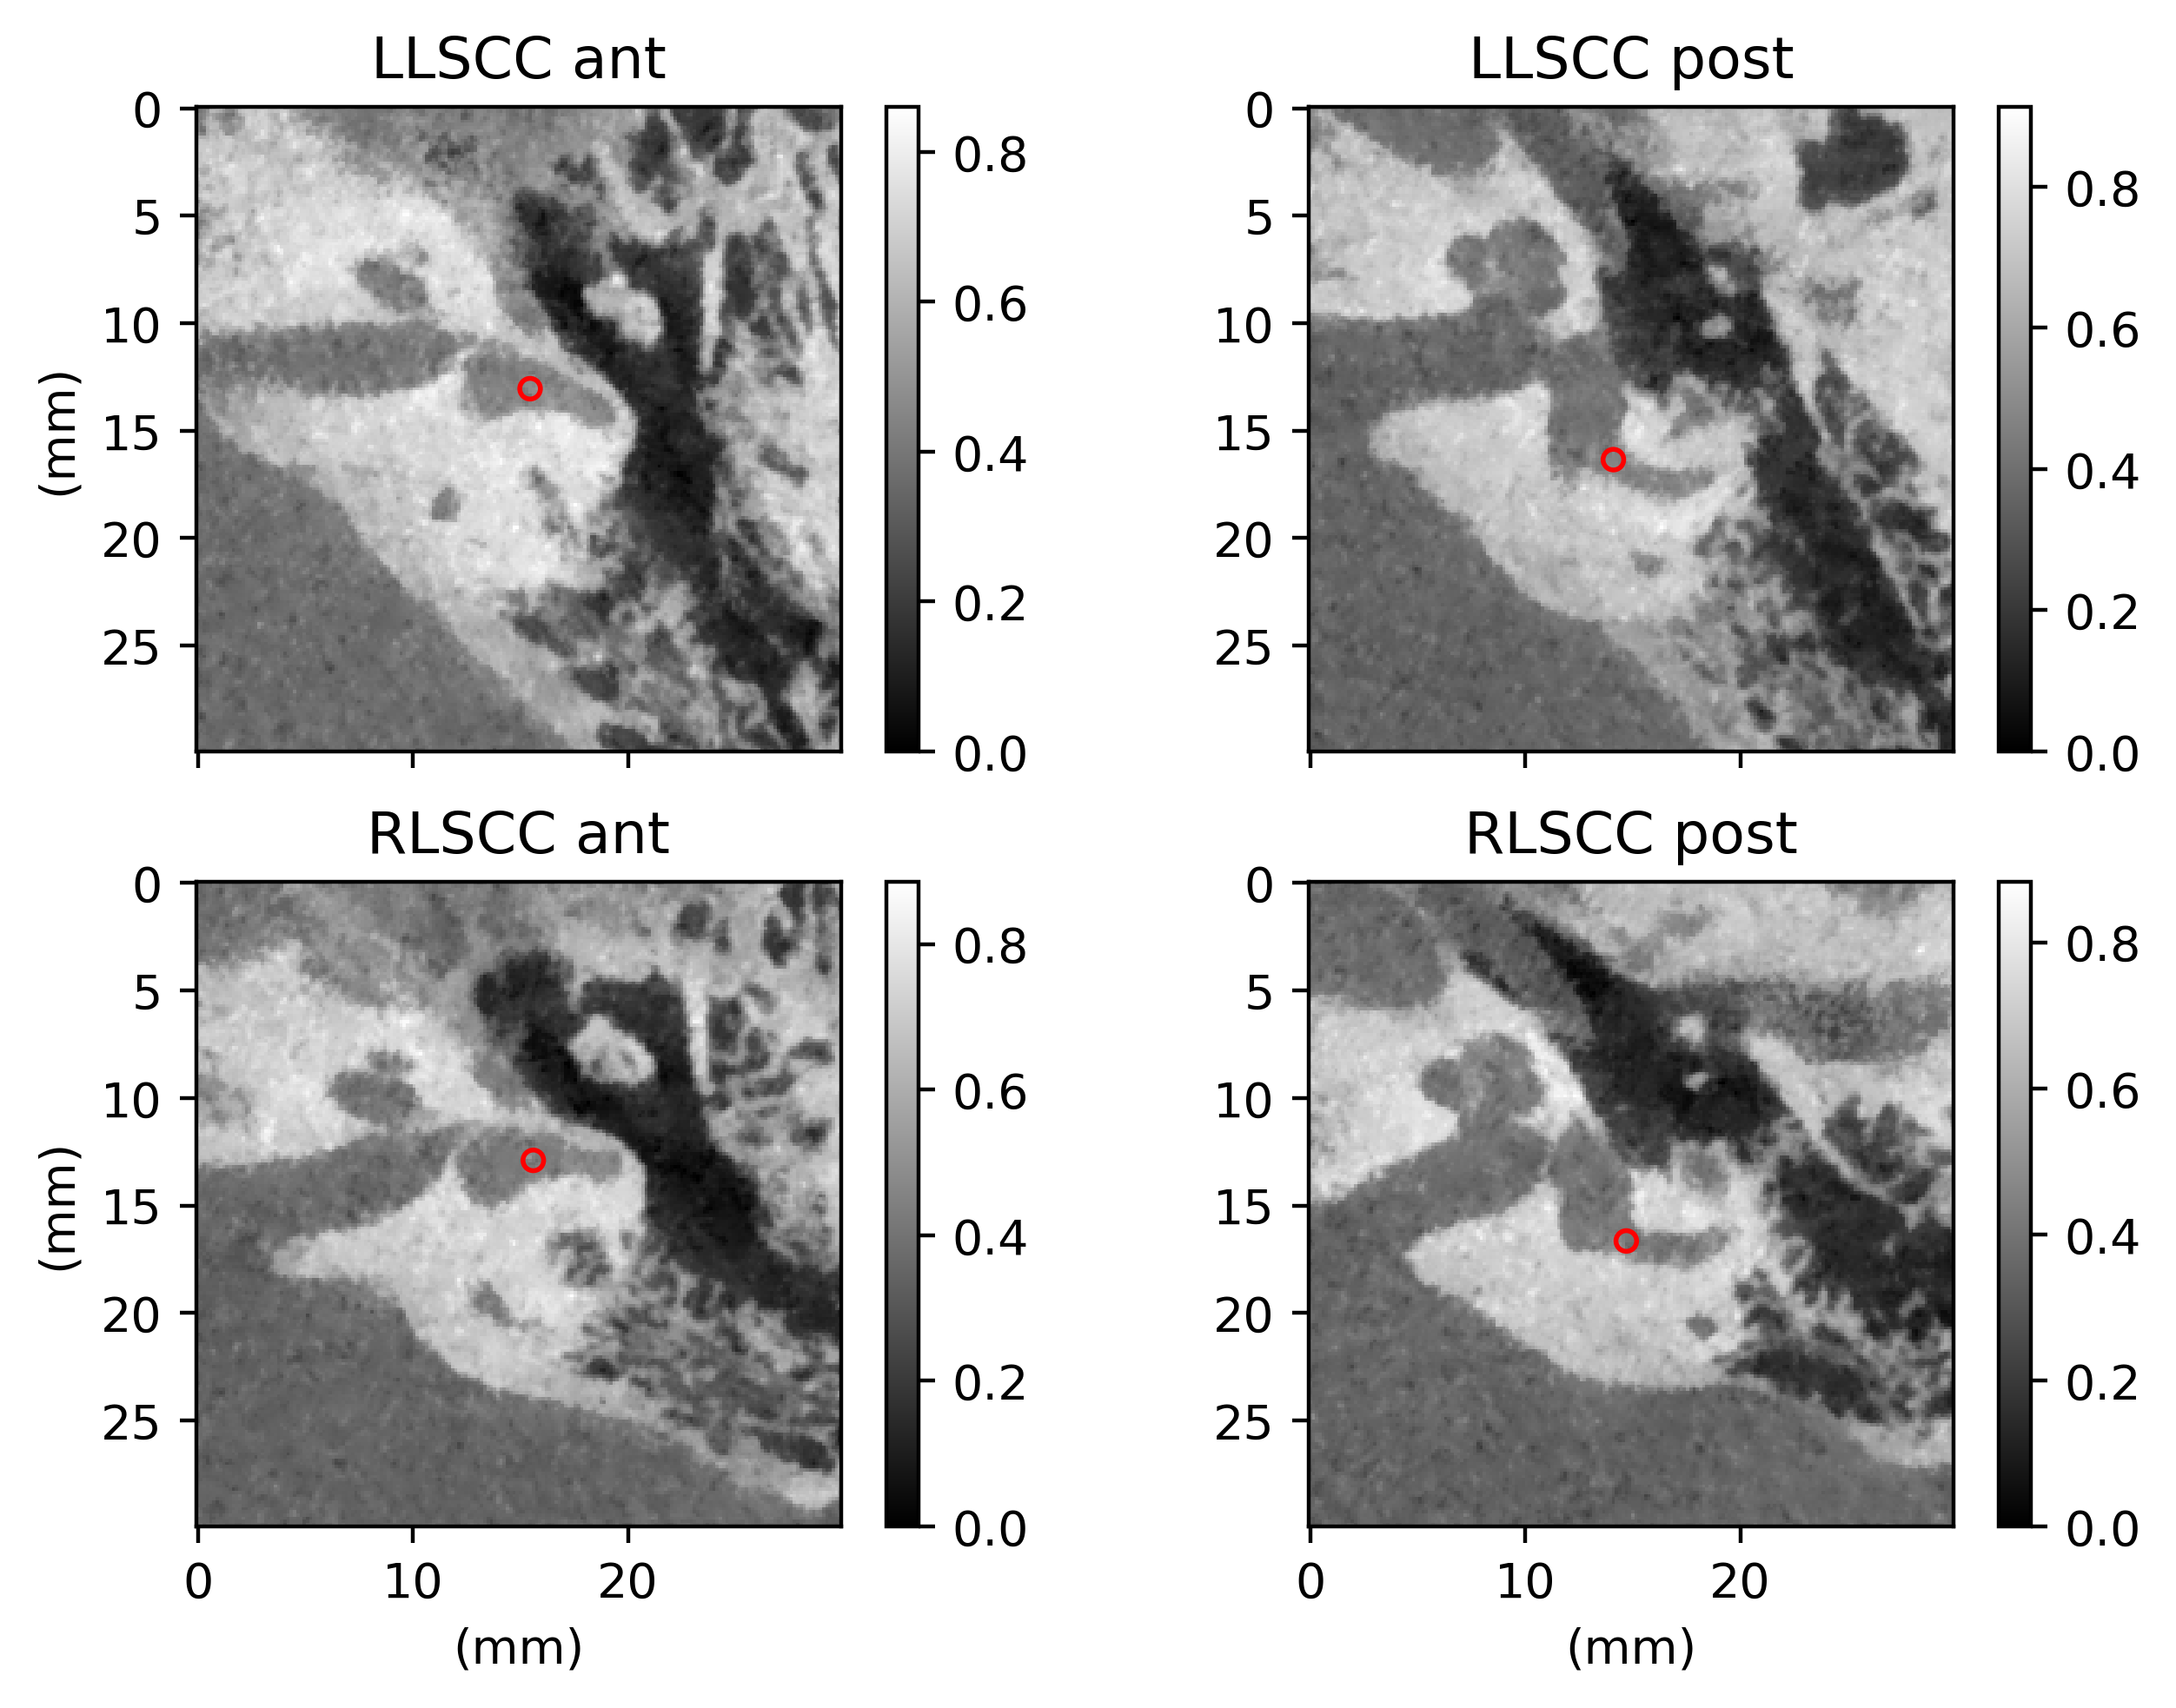

In [94]:
import Functions.Visualization as Visualization

Visualization.show_two_landmarks(pat_volume_left, pat_point_left, pat_volume_right, pat_point_right, [0.15, 0.15, 0.15])

Visualization.show_two_landmarks(pat_volume_left, pat_point_left_new, pat_volume_right, pat_point_right_new, [0.15, 0.15, 0.15])

In [84]:
import math

def angle_3D_points(x1, y1, z1,
                    x2, y2, z2,
                    x3, y3, z3):
    # Find direction ratio of line AB
    ABx = x1 - x2;
    ABy = y1 - y2;
    ABz = z1 - z2;

    # Find direction ratio of line BC
    BCx = x3 - x2;
    BCy = y3 - y2;
    BCz = z3 - z2;
    
    v1_mag = math.sqrt(ABx*ABx + ABy*ABy + ABz*ABz)
    v1_norm = (ABx/v1_mag, ABy/v1_mag, ABz/v1_mag)

    v2_mag = math.sqrt(BCx*BCx + BCy*BCy + BCz*BCz)
    v2_norm = (BCx/v2_mag, BCy/v2_mag, BCz/v2_mag)
    
    dot_products = v1_norm[0] * v2_norm[0] + v1_norm[1] * v2_norm[1] + v1_norm[2] * v2_norm[2]
    
    angle = (math.acos(dot_products) * 180.0) / math.pi
    print(round(angle, 2))
    
    return round(angle, 2)


In [86]:
def cal_angles(pt_points, pt_points_new):
    (Ax1, Ay1, Az1) = pt_points[0]
    (Bx2, By2, Bz2) = np.mean(pt_points, axis=0)
    angle_3D_points(Ax1, Ay1, Az1,
                   Bx2, By2, Bz2,
                   Bx2+1, By2, Bz2)
    angle_3D_points(Ax1, Ay1, Az1,
                   Bx2, By2, Bz2,
                   Bx2, By2+1, Bz2)
    angle_3D_points(Ax1, Ay1, Az1,
                   Bx2, By2, Bz2,
                   Bx2, By2, Bz2+1)

    (Ax1_, Ay1_, Az1_) = pt_points_new[0]
    (Bx2_, By2_, Bz2_) = np.mean(pt_points_new, axis=0)
    angle_3D_points(Ax1_, Ay1_, Az1_,
                   Bx2_, By2_, Bz2_,
                   Bx2_+1, By2_, Bz2_)
    angle_3D_points(Ax1_, Ay1_, Az1_,
                   Bx2_, By2_, Bz2_,
                   Bx2_, By2_+1, Bz2_)
    angle_3D_points(Ax1_, Ay1_, Az1_,
                   Bx2_, By2_, Bz2_,
                   Bx2_, By2_, Bz2_+1)

In [95]:
cal_angles(pat_point_left, pat_point_left_new)

71.69
140.16
56.05
71.69
140.16
56.05
